In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')



In [8]:
# Step 1: Load and Understand the Dataset
# Load the dataset
data = pd.read_csv('C:\Assignment Machine Learning\diabetes.csv')



In [10]:
# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [11]:
# Dataset info
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# Inspect the dataset
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

In [12]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [26]:
# Step 2: Data Cleaning and Handle Missing Values
print("\nStep 2: Data Cleaning and Handle Missing Values")
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)
print("Missing Values Before Imputation:")
display(data.isnull().sum())
for column in columns_with_zeros:
    data[column].fillna(data[column].median(), inplace=True)
print("\nMissing Values After Imputation:")
display(data.isnull().sum())


Step 2: Data Cleaning and Handle Missing Values
Missing Values Before Imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Missing Values After Imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
# Step 3: Exploratory Data Analysis (EDA)
print("\nStep 3: Exploratory Data Analysis (EDA)")
print("Correlation with Outcome:")
display(data.corr()['Outcome'].sort_values(ascending=False))
plt.figure(figsize=(10, 8))




Step 3: Exploratory Data Analysis (EDA)
Correlation with Outcome:


Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

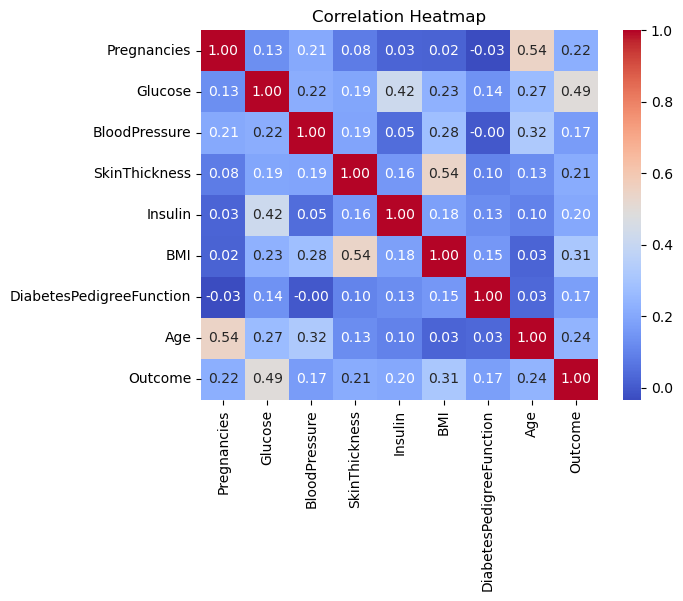

In [28]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()



Outcome Distribution:


Outcome
0    500
1    268
Name: count, dtype: int64

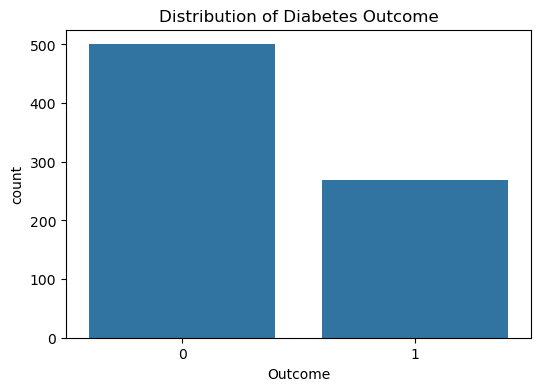

In [29]:
print("\nOutcome Distribution:")
display(data['Outcome'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.savefig('outcome_distribution.png')
plt.show()


Step 4: Visualize Relationships Between Features


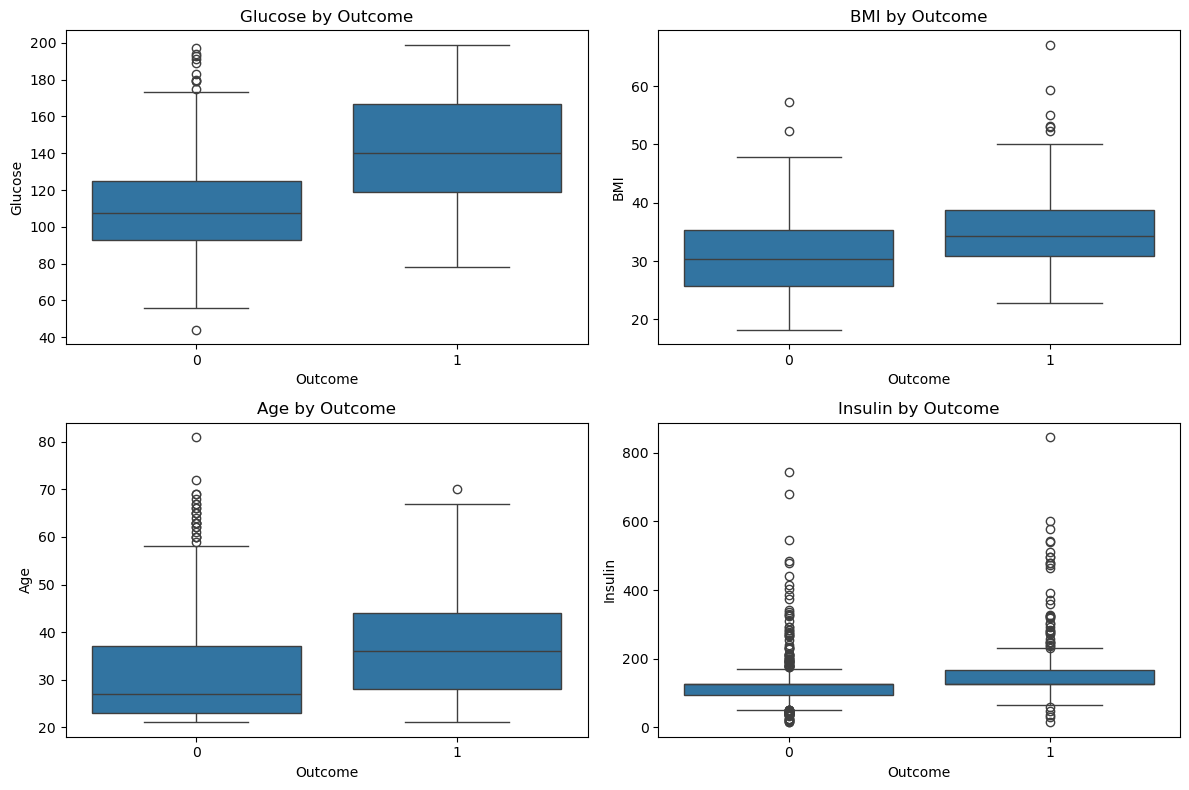

In [30]:
# Step 4: Visualize Relationships Between Features
print("\nStep 4: Visualize Relationships Between Features")
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Glucose', 'BMI', 'Age', 'Insulin'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'{column} by Outcome')
plt.tight_layout()
plt.savefig('boxplots_by_outcome.png')
plt.show()

In [31]:
# Step 5: Handle Categorical Data
print("\nStep 5: Handle Categorical Data")
print("No categorical features; no encoding needed.")



Step 5: Handle Categorical Data
No categorical features; no encoding needed.


In [32]:
# Step 6: Split Data into Training and Test Sets
print("\nStep 6: Split Data into Training and Test Sets")
X = data.drop(columns='Outcome')
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Step 6: Split Data into Training and Test Sets
Training set shape: (537, 8)
Test set shape: (231, 8)


In [33]:
# Step 7: Train Logistic Regression Model
print("\nStep 7: Train Logistic Regression Model")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Model trained successfully!")


Step 7: Train Logistic Regression Model
Model trained successfully!



Step 8: Evaluate Model Performance
Model Accuracy: 0.7403

Confusion Matrix:
[[124  27]
 [ 33  47]]


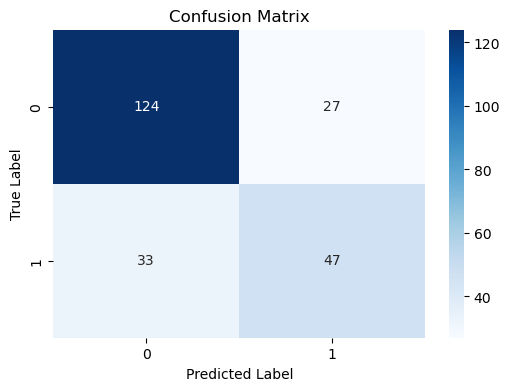

In [34]:
# Step 8: Evaluate Model Performance
print("\nStep 8: Evaluate Model Performance")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()